In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import sklearn as sk
import os
import math
import time


In [4]:
# Load Dataset from GDrive

!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_id_1 = '184Ey_XcyVVHA5e3WtTltKE5mskGUxuzk'
downloaded_1 = drive.CreateFile({'id': file_id_1})
downloaded_1.GetContentFile('clusters.csv')


     |████████████████████████████████| 993kB 4.9MB/s 


In [0]:
data3 = pd.read_csv('clusters.csv')

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_id_1 = '1uyhBSHOQF9e3Sm82V0x6BkPFjTBkNYUS'
downloaded_1 = drive.CreateFile({'id': file_id_1})
downloaded_1.GetContentFile('FinalDataset_v3.csv')

In [0]:
data4 = pd.read_csv('FinalDataset_v3.csv')

In [0]:
data3.head()

,ID,cluster
0,513342,1
1,1095267,2
2,1727192,1
3,1395131,1
4,1471059,1


In [0]:
data4.head()

,customer_id,movie_id,primaryTitle,year,date,titleType,isAdult,startYear,runtimeMinutes,directors,writers,"('primaryName', 'actor')","('primaryName', 'actress')",numVotes,averageRating,Drama,Comedy,Romance,Action,Crime,Thriller,Horror,Adventure,Mystery,Animation,Short,Family,NonFiction,Music,Misc,Fantasy_SciFi,user_rating,drama_rating,comedy_rating,romance_rating,action_rating,crime_rating,thriller_rating,horror_rating,adventure_rating,...,tvSeries,tvShort,tvSpecial,video,videoGame,hist_rating,drama_count,comedy_count,romance_count,action_count,crime_count,thriller_count,horror_count,adventure_count,mystery_count,animation_count,short_count,family_count,rownum,drama_rating_hist,drama_rating1,comedy_rating1,romance_rating1,action_rating1,crime_rating1,thriller_rating1,horror_rating1,adventure_rating1,mystery_rating1,animation_rating1,short_rating1,family_rating1,movies_seen,user_rating_year,user_rating_month,user_rating_dayofweek,user_rating_weekend_flag,movie_flag,Top100Actor,Target_gt4_rating
0,6,269,Parenthood,1989.0,2004-09-27,movie,0,1989.0,124.0,nm0000165,"nm0304665,nm0541632,nm0000165","Steve Martin,Jason Robards","Mary Steenburgen,Dianne Wiest",41406.0,7.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2004,9,Monday,0,1,0,1
1,6,335,Fear No Evil,1981.0,2005-05-15,movie,0,1981.0,99.0,nm0482486,nm0482486,"Stefan Arngrim,Frank Birney","Elizabeth Hoffman,Kathleen Rowe McAllen",1034.0,4.4,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,...,0,0,0,0,0,4.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,4.000000,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2005,5,Sunday,1,1,0,0
2,7,442,Mississippi Burning,1988.0,2005-01-19,movie,0,1988.0,128.0,nm0000570,nm0314665,"Gene Hackman,Willem Dafoe,Brad Dourif",Frances McDormand,79961.0,7.8,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,5.0,5.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,...,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2005,1,Wednesday,0,1,1,1
3,7,1118,Moscow Does Not Believe in Tears,1980.0,2005-01-19,movie,0,1980.0,150.0,nm0579828,"nm0155990,nm0579828",Aleksey Batalov,"Vera Alentova,Irina Muravyova,Raisa Ryazanova",10236.0,8.1,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,5.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,4.666667,5.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2005,1,Wednesday,0,1,0,1
4,7,1194,Fall,1997.0,2005-01-19,movie,0,1997.0,93.0,nm0769703,nm0769703,"Eric Schaeffer,Rudolf Martin","Amanda De Cadenet,Francie Swift",1635.0,6.1,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,5.0,2.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,4.750000,5.0,5.0,5.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2005,1,Wednesday,0,1,0,1


In [0]:
final = pd.merge(data4, data3, how='inner', left_on='customer_id', right_on='ID')

In [0]:
final.head()

,customer_id,movie_id,primaryTitle,year,date,titleType,isAdult,startYear,runtimeMinutes,directors,writers,"('primaryName', 'actor')","('primaryName', 'actress')",numVotes,averageRating,Drama,Comedy,Romance,Action,Crime,Thriller,Horror,Adventure,Mystery,Animation,Short,Family,NonFiction,Music,Misc,Fantasy_SciFi,user_rating,drama_rating,comedy_rating,romance_rating,action_rating,crime_rating,thriller_rating,horror_rating,adventure_rating,...,tvSpecial,video,videoGame,hist_rating,drama_count,comedy_count,romance_count,action_count,crime_count,thriller_count,horror_count,adventure_count,mystery_count,animation_count,short_count,family_count,rownum,drama_rating_hist,drama_rating1,comedy_rating1,romance_rating1,action_rating1,crime_rating1,thriller_rating1,horror_rating1,adventure_rating1,mystery_rating1,animation_rating1,short_rating1,family_rating1,movies_seen,user_rating_year,user_rating_month,user_rating_dayofweek,user_rating_weekend_flag,movie_flag,Top100Actor,Target_gt4_rating,ID,cluster
0,6,269,Parenthood,1989.0,2004-09-27,movie,0,1989.0,124.0,nm0000165,"nm0304665,nm0541632,nm0000165","Steve Martin,Jason Robards","Mary Steenburgen,Dianne Wiest",41406.0,7.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2004,9,Monday,0,1,0,1,6,1
1,6,335,Fear No Evil,1981.0,2005-05-15,movie,0,1981.0,99.0,nm0482486,nm0482486,"Stefan Arngrim,Frank Birney","Elizabeth Hoffman,Kathleen Rowe McAllen",1034.0,4.4,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,...,0,0,0,4.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,4.000000,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2005,5,Sunday,1,1,0,0,6,1
2,7,442,Mississippi Burning,1988.0,2005-01-19,movie,0,1988.0,128.0,nm0000570,nm0314665,"Gene Hackman,Willem Dafoe,Brad Dourif",Frances McDormand,79961.0,7.8,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,5.0,5.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2005,1,Wednesday,0,1,1,1,7,0
3,7,1118,Moscow Does Not Believe in Tears,1980.0,2005-01-19,movie,0,1980.0,150.0,nm0579828,"nm0155990,nm0579828",Aleksey Batalov,"Vera Alentova,Irina Muravyova,Raisa Ryazanova",10236.0,8.1,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,5.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,4.666667,5.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2005,1,Wednesday,0,1,0,1,7,0
4,7,1194,Fall,1997.0,2005-01-19,movie,0,1997.0,93.0,nm0769703,nm0769703,"Eric Schaeffer,Rudolf Martin","Amanda De Cadenet,Francie Swift",1635.0,6.1,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,5.0,2.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,4.750000,5.0,5.0,5.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2005,1,Wednesday,0,1,0,1,7,0


In [0]:
#drop unneeded columns
drop_these_columns = ['rownum','drama_rating_hist','movie',
 'drama_rating',
 'comedy_rating',
 'romance_rating',
 'action_rating',
 'crime_rating',
 'thriller_rating',
 'horror_rating',
 'adventure_rating',
 'mystery_rating',
 'animation_rating',
 'short_rating',
 'family_rating',
 'nonfiction_rating',
 'music_rating',
 'misc_rating',
 'fantasyscifi_rating',
 'short',
 'tvEpisode',
 'tvMiniSeries',
 'tvMovie',
 'tvSeries',
 'tvShort',
 'tvSpecial',
 'video',
 'videoGame',
 'directors',
 'writers',
 "('primaryName', 'actor')",
 "('primaryName', 'actress')",
 'titleType',
 'primaryTitle',
 'customer_id','movie_id','date','user_rating']

#data = data.drop(drop_these_columns, axis=1)
final = final.drop(drop_these_columns, axis=1)

#data = data.fillna(0)
final = final.fillna(0)

In [0]:
final.head()

,year,isAdult,startYear,runtimeMinutes,numVotes,averageRating,Drama,Comedy,Romance,Action,Crime,Thriller,Horror,Adventure,Mystery,Animation,Short,Family,NonFiction,Music,Misc,Fantasy_SciFi,hist_rating,drama_count,comedy_count,romance_count,action_count,crime_count,thriller_count,horror_count,adventure_count,mystery_count,animation_count,short_count,family_count,drama_rating1,comedy_rating1,romance_rating1,action_rating1,crime_rating1,thriller_rating1,horror_rating1,adventure_rating1,mystery_rating1,animation_rating1,short_rating1,family_rating1,movies_seen,user_rating_year,user_rating_month,user_rating_dayofweek,user_rating_weekend_flag,movie_flag,Top100Actor,Target_gt4_rating,ID,cluster
0,1989.0,0,1989.0,124.0,41406.0,7.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2004,9,Monday,0,1,0,1,6,1
1,1981.0,0,1981.0,99.0,1034.0,4.4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2005,5,Sunday,1,1,0,0,6,1
2,1988.0,0,1988.0,128.0,79961.0,7.8,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2005,1,Wednesday,0,1,1,1,7,0
3,1980.0,0,1980.0,150.0,10236.0,8.1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2005,1,Wednesday,0,1,0,1,7,0
4,1997.0,0,1997.0,93.0,1635.0,6.1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2005,1,Wednesday,0,1,0,1,7,0


In [0]:
final['cluster'].nunique()

4

In [0]:
#data
final.to_csv('FinalData_v6.csv', index = None, header = True)

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Create & upload a Master Data v1 8/20
uploaded = drive.CreateFile({'title': 'Final Data v6 for Modeling 8/25'})
uploaded.SetContentFile('FinalData_v6.csv')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1lgxyrMEtZXeXdOaFBs1OqCJnwdSxDV_j


In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_id_1 = '1lgxyrMEtZXeXdOaFBs1OqCJnwdSxDV_j'
downloaded_1 = drive.CreateFile({'id': file_id_1})
downloaded_1.GetContentFile('FinalDataset_v6.csv')

In [6]:
! apt-get install default-jre
!java -version

! pip install h2o

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-68ubuntu1~18.04.1).
default-jre set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.
openjdk version "11.0.4" 2019-07-16
OpenJDK Runtime Environment (build 11.0.4+11-post-Ubuntu-1ubuntu218.04.3)
OpenJDK 64-Bit Server VM (build 11.0.4+11-post-Ubuntu-1ubuntu218.04.3, mixed mode, sharing)
     |████████████████████████████████| 123.6MB 155kB/s 
  Created wheel for h2o: filename=h2o-3.26.0.3-py2.py3-none-any.whl size=123649955 sha256=27a6c7c5d80d283271e89a187e285f7d9076842144c948117b4c6fb94021ca26
  Stored in directory: /root/.cache/pip/wheels/4a/a6/8d/0880c51d5aa9746a87f61d9b66d8a98e7b9cf400c81ffc944e
Successfully built h2o


In [0]:
final = pd.read_csv('FinalDataset_v6.csv')

In [8]:
import h2o
import os
# Start up a 1-node H2O cloud on your local machine, and allow it to use all CPU cores and up to 2GB of memory:


h2o.init(max_mem_size = "12G")             #specify max number of bytes. uses all cores by default.
h2o.remove_all()                          #clean slate, in case cluster was already running

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.4" 2019-07-16; OpenJDK Runtime Environment (build 11.0.4+11-post-Ubuntu-1ubuntu218.04.3); OpenJDK 64-Bit Server VM (build 11.0.4+11-post-Ubuntu-1ubuntu218.04.3, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpy9ua9lxp
  JVM stdout: /tmp/tmpy9ua9lxp/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpy9ua9lxp/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,Etc/UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.26.0.3
H2O cluster version age:,2 days
H2O cluster name:,H2O_from_python_unknownUser_g4eo95
H2O cluster total nodes:,1
H2O cluster free memory:,12 Gb
H2O cluster total cores:,2
H2O cluster allowed cores:,2
H2O cluster status:,"accepting new members, healthy"


In [9]:
frame = h2o.H2OFrame(final)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [10]:
frame.head()

year,isAdult,startYear,runtimeMinutes,numVotes,averageRating,Drama,Comedy,Romance,Action,Crime,Thriller,Horror,Adventure,Mystery,Animation,Short,Family,NonFiction,Music,Misc,Fantasy_SciFi,hist_rating,drama_count,comedy_count,romance_count,action_count,crime_count,thriller_count,horror_count,adventure_count,mystery_count,animation_count,short_count,family_count,drama_rating1,comedy_rating1,romance_rating1,action_rating1,crime_rating1,thriller_rating1,horror_rating1,adventure_rating1,mystery_rating1,animation_rating1,short_rating1,family_rating1,movies_seen,user_rating_year,user_rating_month,user_rating_dayofweek,user_rating_weekend_flag,movie_flag,Top100Actor,Target_gt4_rating,ID,cluster
1989,0,1989,124,41406,7,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2004,9,Monday,0,1,0,1,6,1
1981,0,1981,99,1034,4.4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,4,1,1,0,0,0,0,0,0,0,0,0,0,4,4,0,0,0,0,0,0,0,0,0,0,1,2005,5,Sunday,1,1,0,0,6,1
1988,0,1988,128,79961,7.8,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2005,1,Wednesday,0,1,1,1,7,0
1980,0,1980,150,10236,8.1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,5,1,0,0,0,1,0,0,0,0,0,0,0,5,0,0,0,5,0,0,0,0,0,0,0,1,2005,1,Wednesday,0,1,0,1,7,0
1997,0,1997,93,1635,6.1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,5,2,1,1,0,1,0,0,0,0,0,0,0,5,5,5,0,5,0,0,0,0,0,0,0,2,2005,1,Wednesday,0,1,0,1,7,0
1994,0,1994,89,2803,6.6,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,3,1,2,0,1,0,0,0,0,0,0,0,5,5,5,0,5,0,0,0,0,0,0,0,3,2005,5,Monday,0,1,0,1,7,0
1998,0,1998,100,11755,7.3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.75,4,1,2,0,1,1,0,0,0,0,0,0,4.75,5,5,0,5,4,0,0,0,0,0,0,4,2005,5,Monday,0,1,0,0,7,0
1939,0,1939,237,708,6.9,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,4.4,5,2,2,0,1,1,0,0,0,0,0,0,4.4,4,5,0,5,4,0,0,0,0,0,0,5,2005,5,Monday,0,1,0,1,7,0
2004,0,2004,90,10,6.2,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2002,12,Saturday,1,1,0,0,10,1
2004,0,2004,137,623690,8,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,3,1,0,0,1,1,0,0,0,0,0,0,0,3,0,0,3,3,0,0,0,0,0,0,0,1,2004,2,Thursday,0,1,0,0,10,1


In [0]:
#Conver response to factor (to treat as classification problem)

frame['Target_gt4_rating'] = frame['Target_gt4_rating'].asfactor()

frame['cluster'] = frame['cluster'].asfactor()
frame['Action'] = frame['Action'].asfactor()
frame['Adventure'] = frame['Adventure'].asfactor()
frame['Animation'] = frame['Animation'].asfactor()
frame['Comedy'] = frame['Comedy'].asfactor()
frame['Crime'] = frame['Crime'].asfactor()
frame['Drama'] = frame['Drama'].asfactor()
frame['Family'] = frame['Family'].asfactor()
frame['Fantasy_SciFi'] = frame['Fantasy_SciFi'].asfactor()
frame['Horror'] = frame['Horror'].asfactor()
frame['Misc'] = frame['Misc'].asfactor()
frame['Music'] = frame['Music'].asfactor()
frame['Mystery'] = frame['Mystery'].asfactor()
frame['NonFiction'] = frame['NonFiction'].asfactor()
frame['Romance'] = frame['Romance'].asfactor()
frame['Short'] = frame['Short'].asfactor()
frame['Thriller'] = frame['Thriller'].asfactor()

frame['isAdult'] = frame['isAdult'].asfactor()
frame['movie_flag'] = frame['movie_flag'].asfactor()

In [0]:
#Drop correlated variables
frame = frame.drop('year',axis=1)
frame = frame.drop('comedy_count',axis=1)
frame = frame.drop('romance_count',axis=1)
frame = frame.drop('crime_count',axis=1)
frame = frame.drop('movies_seen',axis=1)

frame = frame.drop('ID',axis=1)

In [0]:
x = ['isAdult',
 'startYear',
 'runtimeMinutes',
 'numVotes',
 'averageRating',
 'Drama',
 'Comedy',
 'Romance',
 'Action',
 'Crime',
 'Thriller',
 'Horror',
 'Adventure',
 'Mystery',
 'Animation',
 'Short',
 'Family',
 'NonFiction',
 'Music',
 'Misc',
 'Fantasy_SciFi',
 'hist_rating',
 'drama_count',
 'action_count',
 'thriller_count',
 'horror_count',
 'adventure_count',
 'mystery_count',
 'animation_count',
 'short_count',
 'family_count',
 'drama_rating1',
 'comedy_rating1',
 'romance_rating1',
 'action_rating1',
 'crime_rating1',
 'thriller_rating1',
 'horror_rating1',
 'adventure_rating1',
 'mystery_rating1',
 'animation_rating1',
 'short_rating1',
 'family_rating1',
 'user_rating_year',
 'user_rating_month',
 'user_rating_dayofweek',
 'user_rating_weekend_flag',
 'movie_flag',
 'Top100Actor',
 'cluster']

In [0]:
#Clusterwise randomforest

from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator

#help(H2OGradientBoostingEstimator)
#help(h2o.import_file)

# 60% for training  
# 20% for validation (hyper parameter tuning)  
# 20% for final testing  

frame1 = frame[frame['cluster']=='0']

#split the data as described above
train, valid, test = frame1.split_frame([0.6, 0.2], seed=1234)

#Prepare predictors and response columns
covtype_X = x     #last column is Cover_Type, our desired response variable 
covtype_y = 'Target_gt4_rating'    


In [20]:
# RandomSearch for Cluster 0
import h2o
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch

gbm_params2 = {
                'max_depth': list(range(15, 30)),
                'sample_rate': [i * 0.1 for i in range(5, 11)],
                
                'min_rows': [2,4,8],
                'stopping_tolerance': [0.01,0.001,0.005] }

# Search criteria
search_criteria = {'strategy': 'RandomDiscrete', 'max_models': 10, 'seed': 1}

# Train and validate for a random grid of RandomForest params
gbm_grid2 = H2OGridSearch(model=H2ORandomForestEstimator,
                          grid_id='rf_grid2',
                          hyper_params=gbm_params2,
                          search_criteria=search_criteria)

gbm_grid2.train(x=covtype_X, y=covtype_y,training_frame=train,
                          stopping_rounds=2,
                          validation_frame=valid,
                          ntrees=10,
                          nfolds=3,
                          seed=1)


drf Grid Build progress: |████████████████████████████████████████████████| 100%


In [0]:
gbm_gridperf2 = gbm_grid2.get_grid(sort_by='auc', decreasing=True)


# Grab the top GBM model, chosen by validation AUC
best_gbm2 = gbm_gridperf2.models[0]

# Now let's evaluate the model performance on a test set
# so we get an honest estimate of top model performance
best_gbm_perf2 = best_gbm2.model_performance(test)

best_gbm_perf2.auc()
# 0.7810757307013204

model_path = h2o.save_model(model=best_gbm2, path="/tmp/mymodel", force=True)



In [22]:
gbm_gridperf2


    max_depth  ...          model_ids                 auc
0          25  ...   rf_grid2_model_3  0.6712727668247992
1          15  ...   rf_grid2_model_6  0.6704657057895588
2          20  ...   rf_grid2_model_8  0.6684491033913746
3          25  ...   rf_grid2_model_1  0.6671619466124379
4          23  ...   rf_grid2_model_5  0.6648254056141465
5          27  ...  rf_grid2_model_10  0.6626713684241873
6          25  ...   rf_grid2_model_9  0.6610276730056474
7          26  ...   rf_grid2_model_4  0.6499890182542681
8          28  ...   rf_grid2_model_7  0.6495104436022986
9          27  ...   rf_grid2_model_2  0.6491144116453277

[10 rows x 7 columns]


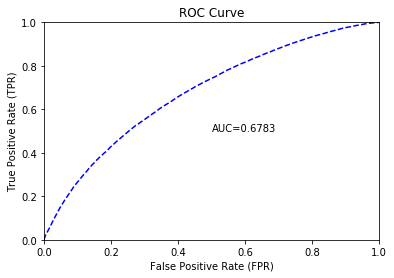

In [23]:
best_gbm_perf2.plot()

drf Grid Build progress: |████████████████████████████████████████████████| 100%


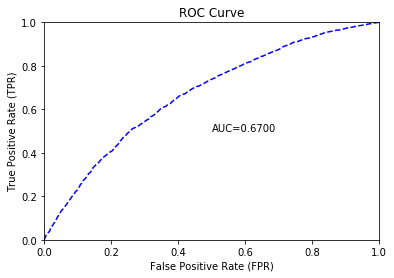

In [24]:
#Clusterwise randomforest for Cluster 1

from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator

#help(H2OGradientBoostingEstimator)
#help(h2o.import_file)

# 60% for training  
# 20% for validation (hyper parameter tuning)  
# 20% for final testing  

frame2 = frame[frame['cluster']=='1']

#split the data as described above
train, valid, test = frame2.split_frame([0.6, 0.2], seed=1234)

#Prepare predictors and response columns
covtype_X = x     #last column is Cover_Type, our desired response variable 
covtype_y = 'Target_gt4_rating'    

gbm_params2 = {
                'max_depth': list(range(15, 30)),
                'sample_rate': [i * 0.1 for i in range(5, 11)],
                
                'min_rows': [2,4,8],
                'stopping_tolerance': [0.01,0.001,0.005] }

# Search criteria
search_criteria = {'strategy': 'RandomDiscrete', 'max_models': 10, 'seed': 1}

# Train and validate for a random grid of RandomForest params
gbm_grid3 = H2OGridSearch(model=H2ORandomForestEstimator,
                          grid_id='rf_grid2',
                          hyper_params=gbm_params2,
                          search_criteria=search_criteria)

gbm_grid3.train(x=covtype_X, y=covtype_y,training_frame=train,
                          stopping_rounds=2,
                          validation_frame=valid,
                          ntrees=10,
                          nfolds=3,
                          seed=1)

gbm_gridperf3 = gbm_grid3.get_grid(sort_by='auc', decreasing=True)
gbm_gridperf3

# Grab the top GBM model, chosen by validation AUC
best_gbm3 = gbm_gridperf3.models[0]

# Now let's evaluate the model performance on a test set
# so we get an honest estimate of top model performance
best_gbm_perf3 = best_gbm3.model_performance(test)

best_gbm_perf3.auc()
# 0.7810757307013204

model_path = h2o.save_model(model=best_gbm3, path="/tmp/mymodel", force=True)

best_gbm_perf3.plot()



drf Grid Build progress: |████████████████████████████████████████████████| 100%


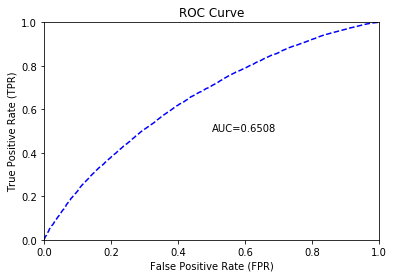

In [25]:
#Clusterwise randomforest for Cluster 2

from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator

#help(H2OGradientBoostingEstimator)
#help(h2o.import_file)

# 60% for training  
# 20% for validation (hyper parameter tuning)  
# 20% for final testing  

frame3 = frame[frame['cluster']=='2']

#split the data as described above
train, valid, test = frame3.split_frame([0.6, 0.2], seed=1234)

#Prepare predictors and response columns
covtype_X = x     #last column is Cover_Type, our desired response variable 
covtype_y = 'Target_gt4_rating'    


gbm_params2 = {
                'max_depth': list(range(15, 30)),
                'sample_rate': [i * 0.1 for i in range(5, 11)],
                
                'min_rows': [2,4,8],
                'stopping_tolerance': [0.01,0.001,0.005] }

# Search criteria
search_criteria = {'strategy': 'RandomDiscrete', 'max_models': 10, 'seed': 1}

# Train and validate for a random grid of RandomForest params
gbm_grid4 = H2OGridSearch(model=H2ORandomForestEstimator,
                          grid_id='rf_grid2',
                          hyper_params=gbm_params2,
                          search_criteria=search_criteria)

gbm_grid4.train(x=covtype_X, y=covtype_y,training_frame=train,
                          stopping_rounds=2,
                          validation_frame=valid,
                          ntrees=10,
                          nfolds=3,
                          seed=1)

gbm_gridperf4 = gbm_grid4.get_grid(sort_by='auc', decreasing=True)
gbm_gridperf4

# Grab the top GBM model, chosen by validation AUC
best_gbm4 = gbm_gridperf4.models[0]

# Now let's evaluate the model performance on a test set
# so we get an honest estimate of top model performance
best_gbm_perf4 = best_gbm4.model_performance(test)

best_gbm_perf4.auc()
# 0.7810757307013204

model_path = h2o.save_model(model=best_gbm4, path="/tmp/mymodel", force=True)

best_gbm_perf4.plot()



drf Grid Build progress: |████████████████████████████████████████████████| 100%


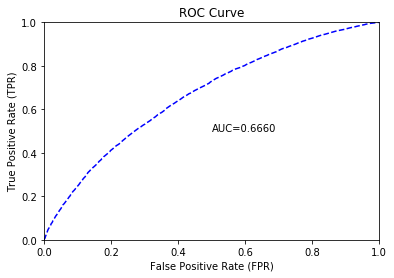

In [33]:
#Clusterwise randomforest for Cluster 3

from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator

#help(H2OGradientBoostingEstimator)
#help(h2o.import_file)

# 60% for training  
# 20% for validation (hyper parameter tuning)  
# 20% for final testing  

frame4 = frame[frame['cluster']=='3']

#split the data as described above
train, valid, test = frame4.split_frame([0.6, 0.2], seed=1234)

#Prepare predictors and response columns
covtype_X = x     #last column is Cover_Type, our desired response variable 
covtype_y = 'Target_gt4_rating'    


gbm_params2 = {
                'max_depth': list(range(15, 30)),
                'sample_rate': [i * 0.1 for i in range(5, 11)],
                
                'min_rows': [2,4,8],
                'stopping_tolerance': [0.01,0.001,0.005] }

# Search criteria
search_criteria = {'strategy': 'RandomDiscrete', 'max_models': 10, 'seed': 1}

# Train and validate for a random grid of RandomForest params
gbm_grid5 = H2OGridSearch(model=H2ORandomForestEstimator,
                          grid_id='rf_grid2',
                          hyper_params=gbm_params2,
                          search_criteria=search_criteria)

gbm_grid5.train(x=covtype_X, y=covtype_y,training_frame=train,
                          stopping_rounds=2,
                          validation_frame=valid,
                          ntrees=25,
                          nfolds=3,
                          seed=1)

gbm_gridperf5 = gbm_grid5.get_grid(sort_by='auc', decreasing=True)
gbm_gridperf5

# Grab the top GBM model, chosen by validation AUC
best_gbm5 = gbm_gridperf5.models[0]

# Now let's evaluate the model performance on a test set
# so we get an honest estimate of top model performance
best_gbm_perf5 = best_gbm5.model_performance(test)

best_gbm_perf5.auc()
# 0.7810757307013204

model_path = h2o.save_model(model=best_gbm5, path="/tmp/mymodel", force=True)

best_gbm_perf5.plot()



In [37]:
best_gbm5

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  rf_grid2_model_3


Model Summary: 

,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,10.0,10.0,1575792.0,25.0,25.0,25.0,11891.0,13084.0,12505.3




ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.24696063374840985
RMSE: 0.4969513394170599
LogLoss: 1.0790432295001486
Mean Per-Class Error: 0.40287089387869524
AUC: 0.6302093528447343
pr_auc: 0.6379944126533337
Gini: 0.2604187056894687

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.10006044642038481: 

,,0,1,Error,Rate
0,0,3290.0,63858.0,0.951,(63858.0/67148.0)
1,1,1436.0,83147.0,0.017,(1436.0/84583.0)
2,Total,4726.0,147005.0,0.4303,(65294.0/151731.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.100060,0.718060,384.0
1,max f2,0.000000,0.862981,399.0
2,max f0point5,0.500007,0.644860,230.0
3,max accuracy,0.454541,0.607753,255.0
4,max precision,0.920171,0.718498,16.0
5,max recall,0.000000,1.000000,399.0
6,max specificity,1.000000,0.985093,0.0
7,max absolute_mcc,0.559396,0.193140,194.0
8,max min_per_class_accuracy,0.566991,0.596574,189.0
9,max mean_per_class_accuracy,0.562488,0.597129,192.0



Gains/Lift Table: Avg response rate: 55.76 %, avg score: 36.20 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.014439,1.000000,1.260705,1.260705,0.702967,1.000000,0.702967,1.000000,0.018203,0.018203,26.070460,26.070460
1,,2,0.020000,0.930299,1.352652,1.286272,0.754237,0.946935,0.717224,0.985245,0.007522,0.025726,35.265230,28.627189
2,,3,0.032335,0.900000,1.242738,1.269665,0.692949,0.912291,0.707963,0.957414,0.015329,0.041055,24.273753,26.966457
3,,4,0.040000,0.878473,1.249067,1.265718,0.696478,0.888393,0.705763,0.944188,0.009574,0.050629,24.906742,26.571767
4,,5,0.050000,0.861567,1.250926,1.262759,0.697515,0.871936,0.704113,0.929738,0.012509,0.063138,25.092631,26.275939
5,,6,0.100009,0.784810,1.270226,1.266493,0.708276,0.816318,0.706195,0.873023,0.063522,0.126661,27.022553,26.649278
6,,7,0.150168,0.736842,1.214650,1.249176,0.677287,0.760028,0.696539,0.835280,0.060925,0.187586,21.464950,24.917619
7,,8,0.200001,0.685146,1.181726,1.232370,0.658929,0.710127,0.687168,0.804097,0.058889,0.246475,18.172553,23.236988
8,,9,0.300670,0.600000,1.077905,1.180653,0.601038,0.639226,0.658330,0.748895,0.108511,0.354986,7.790491,18.065264
9,,10,0.400002,0.501681,0.991540,1.133690,0.552881,0.550908,0.632144,0.699729,0.098492,0.453478,-0.846037,13.369039




ModelMetricsBinomial: drf
** Reported on validation data. **

MSE: 0.2230012503395892
RMSE: 0.4722300819935016
LogLoss: 0.6377566625827907
Mean Per-Class Error: 0.37256725467909235
AUC: 0.677191198722836
pr_auc: 0.7096917083895311
Gini: 0.3543823974456719

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.36728747449611704: 

,,0,1,Error,Rate
0,0,7013.0,27232.0,0.7952,(27232.0/34245.0)
1,1,2879.0,40382.0,0.0665,(2879.0/43261.0)
2,Total,9892.0,67614.0,0.3885,(30111.0/77506.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.367287,0.728424,297.0
1,max f2,0.130245,0.864266,380.0
2,max f0point5,0.526795,0.669645,205.0
3,max accuracy,0.507160,0.635499,217.0
4,max precision,0.993333,1.000000,0.0
5,max recall,0.000000,1.000000,399.0
6,max specificity,0.993333,1.000000,0.0
7,max absolute_mcc,0.573083,0.253261,174.0
8,max min_per_class_accuracy,0.558889,0.626194,183.0
9,max mean_per_class_accuracy,0.573083,0.627433,174.0



Gains/Lift Table: Avg response rate: 55.82 %, avg score: 55.91 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010012,0.873603,1.519158,1.519158,0.847938,0.900034,0.847938,0.900034,0.015210,0.015210,51.915799,51.915799
1,,2,0.020011,0.846849,1.458701,1.488949,0.814194,0.859458,0.831077,0.879759,0.014586,0.029796,45.870149,48.894923
2,,3,0.030011,0.827848,1.467948,1.481952,0.819355,0.837541,0.827171,0.865693,0.014678,0.044474,46.794841,48.195197
3,,4,0.040010,0.814242,1.407843,1.463431,0.785806,0.820662,0.816833,0.854439,0.014077,0.058552,40.784343,46.343081
4,,5,0.050009,0.804902,1.461013,1.462947,0.815484,0.809313,0.816563,0.845416,0.014609,0.073161,46.101322,46.294741
5,,6,0.100018,0.766085,1.394076,1.428512,0.778122,0.785750,0.797343,0.815583,0.069716,0.142877,39.407564,42.851153
6,,7,0.150001,0.737888,1.321263,1.392774,0.737481,0.752618,0.777395,0.794602,0.066041,0.208918,32.126337,39.277444
7,,8,0.200010,0.707606,1.303479,1.370448,0.727554,0.722686,0.764934,0.776621,0.065186,0.274104,30.347921,37.044775
8,,9,0.300003,0.655452,1.202562,1.314491,0.671226,0.680306,0.733700,0.744519,0.120247,0.394351,20.256183,31.449059
9,,10,0.400008,0.611210,1.136993,1.270115,0.634628,0.632689,0.708931,0.716560,0.113705,0.508056,13.699317,27.011481




ModelMetricsBinomial: drf
** Reported on cross-validation data. **

MSE: 0.22479306639864158
RMSE: 0.4741234716807865
LogLoss: 0.6410938360674409
Mean Per-Class Error: 0.3763742169091171
AUC: 0.6712727668247992
pr_auc: 0.7037050439352764
Gini: 0.3425455336495984

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3689139536546656: 

,,0,1,Error,Rate
0,0,20927.0,82329.0,0.7973,(82329.0/103256.0)
1,1,9071.0,121072.0,0.0697,(9071.0/130143.0)
2,Total,29998.0,203401.0,0.3916,(91400.0/233399.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.368914,0.725973,297.0
1,max f2,0.132438,0.863826,380.0
2,max f0point5,0.530439,0.666701,204.0
3,max accuracy,0.494142,0.631459,227.0
4,max precision,0.992830,1.000000,0.0
5,max recall,0.000015,1.000000,399.0
6,max specificity,0.992830,1.000000,0.0
7,max absolute_mcc,0.544151,0.246635,195.0
8,max min_per_class_accuracy,0.557522,0.623038,186.0
9,max mean_per_class_accuracy,0.545479,0.623626,194.0



Gains/Lift Table: Avg response rate: 55.76 %, avg score: 55.75 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010000,0.870746,1.512945,1.512945,0.843616,0.899476,0.843616,0.899476,0.015130,0.015130,51.294466,51.294466
1,,2,0.020004,0.844697,1.470822,1.491879,0.820128,0.856626,0.831870,0.878047,0.014715,0.029844,47.082184,49.187874
2,,3,0.030000,0.827578,1.440566,1.474782,0.803258,0.835836,0.822336,0.863982,0.014400,0.044244,44.056555,47.478167
3,,4,0.040000,0.814005,1.423812,1.462039,0.793916,0.820242,0.815231,0.853047,0.014238,0.058482,42.381231,46.203933
4,,5,0.050000,0.804536,1.399992,1.449630,0.780634,0.809215,0.808312,0.844281,0.014000,0.072482,39.999246,44.962996
5,,6,0.100000,0.765025,1.376326,1.412978,0.767438,0.783900,0.787875,0.814090,0.068817,0.141298,37.632629,41.297813
6,,7,0.150001,0.735684,1.326381,1.384113,0.739589,0.749380,0.771779,0.792520,0.066319,0.207618,32.638145,38.411257
7,,8,0.200001,0.705052,1.271212,1.355887,0.708826,0.720166,0.756041,0.774432,0.063561,0.271179,27.121160,35.588732
8,,9,0.300074,0.652512,1.207325,1.306342,0.673203,0.677671,0.728415,0.742162,0.120821,0.392000,20.732488,30.634247
9,,10,0.400002,0.605151,1.119657,1.259705,0.624319,0.628442,0.702410,0.713753,0.111885,0.503884,11.965692,25.970508




Cross-Validation Metrics Summary: 

,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid
0,accuracy,0.6070142,0.0051218425,0.60764724,0.60160524,0.61179006
1,auc,0.6712916,1.7767816E-4,0.6714402,0.67133975,0.6710948
2,err,0.3929858,0.0051218425,0.39235273,0.39839476,0.3882099
3,err_count,30572.666,288.43774,30753.0,30725.0,30240.0
4,f0point5,0.64052767,0.00418979,0.64086586,0.6361791,0.64453816
5,f1,0.72608256,0.0019508954,0.72638947,0.72399634,0.72786176
6,f2,0.83804095,0.002015082,0.83825475,0.83994067,0.83592755
7,lift_top_group,1.51651,0.019063773,1.5057576,1.5385209,1.5052513
8,logloss,0.6410927,6.6264713E-4,0.6417214,0.64115614,0.64040065
9,max_per_class_error,0.8051464,0.016220221,0.8037599,0.82201535,0.7896639



Scoring History: 

,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2019-08-27 00:20:37,5 min 53.484 sec,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2019-08-27 00:20:40,5 min 56.134 sec,1.0,0.503733,1.281027,0.620171,0.618378,1.219841,0.427476,0.504392,1.301414,0.619359,0.619007,1.262167,0.431747
2,,2019-08-27 00:20:45,6 min 1.426 sec,3.0,0.501563,1.245424,0.625282,0.623421,1.286209,0.417748,0.480760,0.667434,0.654675,0.686224,1.477600,0.414561
3,,2019-08-27 00:20:51,6 min 7.097 sec,5.0,0.501210,1.197877,0.623795,0.625748,1.267451,0.429000,0.475983,0.648962,0.665721,0.698467,1.468365,0.396021
4,,2019-08-27 00:20:59,6 min 15.173 sec,8.0,0.498723,1.125103,0.627727,0.632884,1.251647,0.432284,0.473187,0.639853,0.674270,0.707029,1.510285,0.394602
5,,2019-08-27 00:21:05,6 min 21.207 sec,10.0,0.496951,1.079043,0.630209,0.637994,1.260705,0.430327,0.472230,0.637757,0.677191,0.709692,1.519158,0.388499



Variable Importances: 

,variable,relative_importance,scaled_importance,percentage
0,hist_rating,11979.578125,1.000000,0.098162
1,user_rating_dayofweek,10721.154297,0.894953,0.087850
2,averageRating,8436.315430,0.704225,0.069128
3,user_rating_month,7301.340332,0.609482,0.059828
4,startYear,7281.280762,0.607808,0.059664
5,drama_rating1,6952.907227,0.580397,0.056973
6,user_rating_year,6317.771484,0.527378,0.051768
7,comedy_rating1,5596.267578,0.467151,0.045856
8,runtimeMinutes,5501.433594,0.459234,0.045079
9,numVotes,5385.962891,0.449595,0.044133



See the whole table with table.as_data_frame()


In [0]:
#help(h2o) RandomSearch for 10 trees All Clusters

from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator

#help(H2OGradientBoostingEstimator)
#help(h2o.import_file)

# 60% for training  
# 20% for validation (hyper parameter tuning)  
# 20% for final testing  

#split the data as described above
train, valid, test = frame.split_frame([0.6, 0.2], seed=1234)

#Prepare predictors and response columns
covtype_X = x     #last column is Cover_Type, our desired response variable 
covtype_y = 'Target_gt4_rating'    


In [41]:
# RandomSearch
import h2o
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch

gbm_params2 = {
                'max_depth': list(range(15, 30)),
                'sample_rate': [i * 0.1 for i in range(5, 11)],
                
                'min_rows': [2,4,8],
                'stopping_tolerance': [0.01,0.001,0.005] }

# Search criteria
search_criteria = {'strategy': 'RandomDiscrete', 'max_models': 10, 'seed': 1}

# Train and validate a random grid of GBMs
gbm_grid2 = H2OGridSearch(model=H2ORandomForestEstimator,
                          grid_id='rf_grid2',
                          hyper_params=gbm_params2,
                          search_criteria=search_criteria)

gbm_grid2.train(x=covtype_X, y=covtype_y,training_frame=train,
                          stopping_rounds=2,
                          validation_frame=valid,
                          ntrees=10,
                          nfolds=3,
                          seed=1)



drf Grid Build progress: |████████████████████████████████████████████████| 100%


In [42]:
# Get the grid results, sorted by validation AUC
gbm_gridperf2 = gbm_grid2.get_grid(sort_by='auc', decreasing=True)
gbm_gridperf2



     max_depth  ...          model_ids                 auc
0           25  ...  rf_grid2_model_53  0.6764548921027874
1           20  ...  rf_grid2_model_58  0.6761258864600022
2           15  ...  rf_grid2_model_56  0.6745300862675647
3           25  ...  rf_grid2_model_51  0.6743187203608215
4           25  ...   rf_grid2_model_3  0.6712727668247992
5           15  ...   rf_grid2_model_6  0.6704657057895588
6           23  ...  rf_grid2_model_55   0.669037449315189
7           20  ...   rf_grid2_model_8  0.6684491033913746
8           27  ...  rf_grid2_model_60  0.6671697696722688
9           25  ...   rf_grid2_model_1  0.6671619466124379
10          25  ...  rf_grid2_model_59   0.666832763290152
11          23  ...   rf_grid2_model_5  0.6648254056141465
12          27  ...  rf_grid2_model_10  0.6626713684241873
13          25  ...  rf_grid2_model_43  0.6626300456428411
14          15  ...  rf_grid2_model_46  0.6617098867450041
15          20  ...  rf_grid2_model_48  0.66123443895341

In [43]:
# Grab the top GBM model, chosen by validation AUC
best_gbm2 = gbm_gridperf2.models[0]

# Now let's evaluate the model performance on a test set
# so we get an honest estimate of top model performance
best_gbm_perf2 = best_gbm2.model_performance(test)

best_gbm_perf2.auc()
# 0.7810757307013204

0.6838299145533887

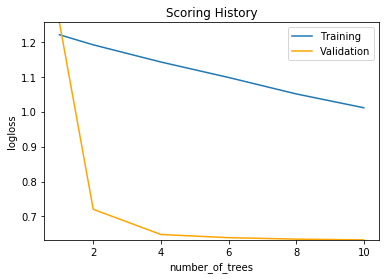

In [45]:
best_gbm2.plot()

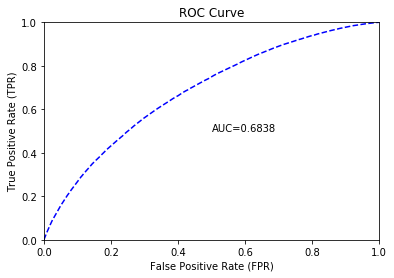

In [44]:
best_gbm_perf2.plot()

In [38]:
best_gbm2

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  rf_grid2_model_3


Model Summary: 

,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,10.0,10.0,1575792.0,25.0,25.0,25.0,11891.0,13084.0,12505.3




ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.24696063374840985
RMSE: 0.4969513394170599
LogLoss: 1.0790432295001486
Mean Per-Class Error: 0.40287089387869524
AUC: 0.6302093528447343
pr_auc: 0.6379944126533337
Gini: 0.2604187056894687

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.10006044642038481: 

,,0,1,Error,Rate
0,0,3290.0,63858.0,0.951,(63858.0/67148.0)
1,1,1436.0,83147.0,0.017,(1436.0/84583.0)
2,Total,4726.0,147005.0,0.4303,(65294.0/151731.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.100060,0.718060,384.0
1,max f2,0.000000,0.862981,399.0
2,max f0point5,0.500007,0.644860,230.0
3,max accuracy,0.454541,0.607753,255.0
4,max precision,0.920171,0.718498,16.0
5,max recall,0.000000,1.000000,399.0
6,max specificity,1.000000,0.985093,0.0
7,max absolute_mcc,0.559396,0.193140,194.0
8,max min_per_class_accuracy,0.566991,0.596574,189.0
9,max mean_per_class_accuracy,0.562488,0.597129,192.0



Gains/Lift Table: Avg response rate: 55.76 %, avg score: 36.20 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.014439,1.000000,1.260705,1.260705,0.702967,1.000000,0.702967,1.000000,0.018203,0.018203,26.070460,26.070460
1,,2,0.020000,0.930299,1.352652,1.286272,0.754237,0.946935,0.717224,0.985245,0.007522,0.025726,35.265230,28.627189
2,,3,0.032335,0.900000,1.242738,1.269665,0.692949,0.912291,0.707963,0.957414,0.015329,0.041055,24.273753,26.966457
3,,4,0.040000,0.878473,1.249067,1.265718,0.696478,0.888393,0.705763,0.944188,0.009574,0.050629,24.906742,26.571767
4,,5,0.050000,0.861567,1.250926,1.262759,0.697515,0.871936,0.704113,0.929738,0.012509,0.063138,25.092631,26.275939
5,,6,0.100009,0.784810,1.270226,1.266493,0.708276,0.816318,0.706195,0.873023,0.063522,0.126661,27.022553,26.649278
6,,7,0.150168,0.736842,1.214650,1.249176,0.677287,0.760028,0.696539,0.835280,0.060925,0.187586,21.464950,24.917619
7,,8,0.200001,0.685146,1.181726,1.232370,0.658929,0.710127,0.687168,0.804097,0.058889,0.246475,18.172553,23.236988
8,,9,0.300670,0.600000,1.077905,1.180653,0.601038,0.639226,0.658330,0.748895,0.108511,0.354986,7.790491,18.065264
9,,10,0.400002,0.501681,0.991540,1.133690,0.552881,0.550908,0.632144,0.699729,0.098492,0.453478,-0.846037,13.369039




ModelMetricsBinomial: drf
** Reported on validation data. **

MSE: 0.2230012503395892
RMSE: 0.4722300819935016
LogLoss: 0.6377566625827907
Mean Per-Class Error: 0.37256725467909235
AUC: 0.677191198722836
pr_auc: 0.7096917083895311
Gini: 0.3543823974456719

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.36728747449611704: 

,,0,1,Error,Rate
0,0,7013.0,27232.0,0.7952,(27232.0/34245.0)
1,1,2879.0,40382.0,0.0665,(2879.0/43261.0)
2,Total,9892.0,67614.0,0.3885,(30111.0/77506.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.367287,0.728424,297.0
1,max f2,0.130245,0.864266,380.0
2,max f0point5,0.526795,0.669645,205.0
3,max accuracy,0.507160,0.635499,217.0
4,max precision,0.993333,1.000000,0.0
5,max recall,0.000000,1.000000,399.0
6,max specificity,0.993333,1.000000,0.0
7,max absolute_mcc,0.573083,0.253261,174.0
8,max min_per_class_accuracy,0.558889,0.626194,183.0
9,max mean_per_class_accuracy,0.573083,0.627433,174.0



Gains/Lift Table: Avg response rate: 55.82 %, avg score: 55.91 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010012,0.873603,1.519158,1.519158,0.847938,0.900034,0.847938,0.900034,0.015210,0.015210,51.915799,51.915799
1,,2,0.020011,0.846849,1.458701,1.488949,0.814194,0.859458,0.831077,0.879759,0.014586,0.029796,45.870149,48.894923
2,,3,0.030011,0.827848,1.467948,1.481952,0.819355,0.837541,0.827171,0.865693,0.014678,0.044474,46.794841,48.195197
3,,4,0.040010,0.814242,1.407843,1.463431,0.785806,0.820662,0.816833,0.854439,0.014077,0.058552,40.784343,46.343081
4,,5,0.050009,0.804902,1.461013,1.462947,0.815484,0.809313,0.816563,0.845416,0.014609,0.073161,46.101322,46.294741
5,,6,0.100018,0.766085,1.394076,1.428512,0.778122,0.785750,0.797343,0.815583,0.069716,0.142877,39.407564,42.851153
6,,7,0.150001,0.737888,1.321263,1.392774,0.737481,0.752618,0.777395,0.794602,0.066041,0.208918,32.126337,39.277444
7,,8,0.200010,0.707606,1.303479,1.370448,0.727554,0.722686,0.764934,0.776621,0.065186,0.274104,30.347921,37.044775
8,,9,0.300003,0.655452,1.202562,1.314491,0.671226,0.680306,0.733700,0.744519,0.120247,0.394351,20.256183,31.449059
9,,10,0.400008,0.611210,1.136993,1.270115,0.634628,0.632689,0.708931,0.716560,0.113705,0.508056,13.699317,27.011481




ModelMetricsBinomial: drf
** Reported on cross-validation data. **

MSE: 0.22479306639864158
RMSE: 0.4741234716807865
LogLoss: 0.6410938360674409
Mean Per-Class Error: 0.3763742169091171
AUC: 0.6712727668247992
pr_auc: 0.7037050439352764
Gini: 0.3425455336495984

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3689139536546656: 

,,0,1,Error,Rate
0,0,20927.0,82329.0,0.7973,(82329.0/103256.0)
1,1,9071.0,121072.0,0.0697,(9071.0/130143.0)
2,Total,29998.0,203401.0,0.3916,(91400.0/233399.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.368914,0.725973,297.0
1,max f2,0.132438,0.863826,380.0
2,max f0point5,0.530439,0.666701,204.0
3,max accuracy,0.494142,0.631459,227.0
4,max precision,0.992830,1.000000,0.0
5,max recall,0.000015,1.000000,399.0
6,max specificity,0.992830,1.000000,0.0
7,max absolute_mcc,0.544151,0.246635,195.0
8,max min_per_class_accuracy,0.557522,0.623038,186.0
9,max mean_per_class_accuracy,0.545479,0.623626,194.0



Gains/Lift Table: Avg response rate: 55.76 %, avg score: 55.75 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010000,0.870746,1.512945,1.512945,0.843616,0.899476,0.843616,0.899476,0.015130,0.015130,51.294466,51.294466
1,,2,0.020004,0.844697,1.470822,1.491879,0.820128,0.856626,0.831870,0.878047,0.014715,0.029844,47.082184,49.187874
2,,3,0.030000,0.827578,1.440566,1.474782,0.803258,0.835836,0.822336,0.863982,0.014400,0.044244,44.056555,47.478167
3,,4,0.040000,0.814005,1.423812,1.462039,0.793916,0.820242,0.815231,0.853047,0.014238,0.058482,42.381231,46.203933
4,,5,0.050000,0.804536,1.399992,1.449630,0.780634,0.809215,0.808312,0.844281,0.014000,0.072482,39.999246,44.962996
5,,6,0.100000,0.765025,1.376326,1.412978,0.767438,0.783900,0.787875,0.814090,0.068817,0.141298,37.632629,41.297813
6,,7,0.150001,0.735684,1.326381,1.384113,0.739589,0.749380,0.771779,0.792520,0.066319,0.207618,32.638145,38.411257
7,,8,0.200001,0.705052,1.271212,1.355887,0.708826,0.720166,0.756041,0.774432,0.063561,0.271179,27.121160,35.588732
8,,9,0.300074,0.652512,1.207325,1.306342,0.673203,0.677671,0.728415,0.742162,0.120821,0.392000,20.732488,30.634247
9,,10,0.400002,0.605151,1.119657,1.259705,0.624319,0.628442,0.702410,0.713753,0.111885,0.503884,11.965692,25.970508




Cross-Validation Metrics Summary: 

,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid
0,accuracy,0.6070142,0.0051218425,0.60764724,0.60160524,0.61179006
1,auc,0.6712916,1.7767816E-4,0.6714402,0.67133975,0.6710948
2,err,0.3929858,0.0051218425,0.39235273,0.39839476,0.3882099
3,err_count,30572.666,288.43774,30753.0,30725.0,30240.0
4,f0point5,0.64052767,0.00418979,0.64086586,0.6361791,0.64453816
5,f1,0.72608256,0.0019508954,0.72638947,0.72399634,0.72786176
6,f2,0.83804095,0.002015082,0.83825475,0.83994067,0.83592755
7,lift_top_group,1.51651,0.019063773,1.5057576,1.5385209,1.5052513
8,logloss,0.6410927,6.6264713E-4,0.6417214,0.64115614,0.64040065
9,max_per_class_error,0.8051464,0.016220221,0.8037599,0.82201535,0.7896639



Scoring History: 

,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2019-08-27 00:20:37,5 min 53.484 sec,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2019-08-27 00:20:40,5 min 56.134 sec,1.0,0.503733,1.281027,0.620171,0.618378,1.219841,0.427476,0.504392,1.301414,0.619359,0.619007,1.262167,0.431747
2,,2019-08-27 00:20:45,6 min 1.426 sec,3.0,0.501563,1.245424,0.625282,0.623421,1.286209,0.417748,0.480760,0.667434,0.654675,0.686224,1.477600,0.414561
3,,2019-08-27 00:20:51,6 min 7.097 sec,5.0,0.501210,1.197877,0.623795,0.625748,1.267451,0.429000,0.475983,0.648962,0.665721,0.698467,1.468365,0.396021
4,,2019-08-27 00:20:59,6 min 15.173 sec,8.0,0.498723,1.125103,0.627727,0.632884,1.251647,0.432284,0.473187,0.639853,0.674270,0.707029,1.510285,0.394602
5,,2019-08-27 00:21:05,6 min 21.207 sec,10.0,0.496951,1.079043,0.630209,0.637994,1.260705,0.430327,0.472230,0.637757,0.677191,0.709692,1.519158,0.388499



Variable Importances: 

,variable,relative_importance,scaled_importance,percentage
0,hist_rating,11979.578125,1.000000,0.098162
1,user_rating_dayofweek,10721.154297,0.894953,0.087850
2,averageRating,8436.315430,0.704225,0.069128
3,user_rating_month,7301.340332,0.609482,0.059828
4,startYear,7281.280762,0.607808,0.059664
5,drama_rating1,6952.907227,0.580397,0.056973
6,user_rating_year,6317.771484,0.527378,0.051768
7,comedy_rating1,5596.267578,0.467151,0.045856
8,runtimeMinutes,5501.433594,0.459234,0.045079
9,numVotes,5385.962891,0.449595,0.044133



See the whole table with table.as_data_frame()


In [0]:
model_path = h2o.save_model(model=best_gbm2, path="/tmp/mymodel", force=True)

In [0]:
# RandomSearch
import h2o
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch

#Initialize Parameters
rf_params2 = {
                'max_depth': list(range(15, 30)),
                'sample_rate': [i * 0.1 for i in range(5, 11)],
                
                'min_rows': [2,4,8],
                'stopping_tolerance': [0.01,0.001,0.005] }

# Search criteria
search_criteria = {'strategy': 'RandomDiscrete', 'max_models': 10, 'seed': 1}

# Train and validate a random grid of RFs using RandomSearch
rf_grid2 = H2OGridSearch(model=H2ORandomForestEstimator,
                          grid_id='rf_grid2',
                          hyper_params=rf_params2,
                          search_criteria=search_criteria)

rf_grid2.train(x=covtype_X, y=covtype_y,training_frame=train,
                          stopping_rounds=2,
                          validation_frame=valid,
                          ntrees=50,
                          nfolds=3,
                          seed=1)



drf Grid Build progress: |████████████████████████████████████████████████| 100%


In [0]:
pd.set_option('display.max_columns', 100)

In [0]:
# Get the grid results, sorted by validation AUC
gbm_gridperf2 = gbm_grid2.get_grid(sort_by='auc', decreasing=True)
gbm_gridperf2


     max_depth min_rows         sample_rate stopping_tolerance  \
0           20      8.0  0.6000000000000001              0.001   
1           23      4.0  0.7000000000000001              0.005   
2           25      8.0  0.6000000000000001               0.01   
3           25      8.0                 0.9               0.01   
4           15      4.0                 0.9               0.01   
5           26      2.0                 0.5              0.001   
6           27      4.0                 0.8              0.005   
7           25      4.0                 0.5               0.01   
8           25      8.0                 0.9               0.01   
9           15      4.0                 0.9               0.01   
10          28      2.0  0.7000000000000001              0.001   
11          20      8.0  0.6000000000000001              0.001   
12          25      8.0  0.6000000000000001               0.01   
13          27      2.0                 0.5               0.01   
14        

In [0]:
# Grab the top GBM model, chosen by validation AUC
best_gbm3 = gbm_gridperf2.models[0]

# Now let's evaluate the model performance on a test set
# so we get an honest estimate of top model performance
best_gbm_perf3 = best_gbm3.model_performance(test)

best_gbm_perf3.auc()
# 0.7810757307013204

0.6911341964108828

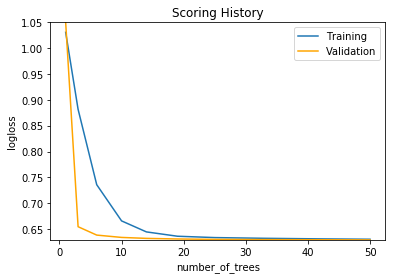

In [0]:
best_gbm3.model_performance()
best_gbm3.plot()

In [0]:
best_gbm3

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  rf_grid2_model_18


Model Summary: 

,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,50.0,5840532.0,20.0,20.0,20.0,7528.0,10477.0,9274.08




ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.2202392658546959
RMSE: 0.4692965649295719
LogLoss: 0.6305682371809419
Mean Per-Class Error: 0.36721225868658636
AUC: 0.6847493111669677
pr_auc: 0.7223166283144894
Gini: 0.3694986223339354

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.38749491370202716: 

,,0,1,Error,Rate
0,0,35501.0,145792.0,0.8042,(145792.0/181293.0)
1,1,13720.0,223710.0,0.0578,(13720.0/237430.0)
2,Total,49221.0,369502.0,0.3809,(159512.0/418723.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.387495,0.737183,294.0
1,max f2,0.193538,0.868251,370.0
2,max f0point5,0.547022,0.681502,195.0
3,max accuracy,0.510363,0.644099,219.0
4,max precision,0.979040,1.000000,0.0
5,max recall,0.003835,1.000000,399.0
6,max specificity,0.979040,1.000000,0.0
7,max absolute_mcc,0.547022,0.264323,195.0
8,max min_per_class_accuracy,0.565985,0.631028,182.0
9,max mean_per_class_accuracy,0.565985,0.632788,182.0



Gains/Lift Table: Avg response rate: 56.70 %, avg score: 56.74 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010002,0.837566,1.518905,1.518905,0.861270,0.865338,0.861270,0.865338,0.015192,0.015192,51.890529,51.890529
1,,2,0.020001,0.816859,1.472515,1.495713,0.834965,0.825951,0.848119,0.845647,0.014724,0.029916,47.251486,49.571284
2,,3,0.030001,0.805987,1.459036,1.483488,0.827323,0.810940,0.841188,0.834079,0.014590,0.044506,45.903647,48.348836
3,,4,0.040000,0.797319,1.426183,1.469163,0.808694,0.801569,0.833065,0.825952,0.014261,0.058767,42.618287,46.916284
4,,5,0.050002,0.790174,1.391733,1.453675,0.789160,0.793554,0.824282,0.819472,0.013920,0.072687,39.173329,45.367471
5,,6,0.100002,0.757559,1.381049,1.417362,0.783101,0.774170,0.803692,0.796821,0.069052,0.141739,38.104852,41.736248
6,,7,0.150001,0.731438,1.346428,1.393718,0.763470,0.745228,0.790285,0.779624,0.067321,0.209060,34.642754,39.371788
7,,8,0.200001,0.701537,1.289737,1.367723,0.731324,0.716426,0.775545,0.763824,0.064486,0.273546,28.973674,36.772290
8,,9,0.300000,0.652116,1.221716,1.319054,0.692754,0.674632,0.747948,0.734094,0.122171,0.395717,22.171620,31.905439
9,,10,0.400000,0.610757,1.136933,1.273524,0.644679,0.631810,0.722131,0.708523,0.113692,0.509409,13.693271,27.352424




ModelMetricsBinomial: drf
** Reported on validation data. **

MSE: 0.2195993986318101
RMSE: 0.46861433890973725
LogLoss: 0.6292974978941257
Mean Per-Class Error: 0.36331300340909645
AUC: 0.6878986236412046
pr_auc: 0.723532249954748
Gini: 0.37579724728240915

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4059006855572447: 

,,0,1,Error,Rate
0,0,13662.0,46591.0,0.7733,(46591.0/60253.0)
1,1,5466.0,73508.0,0.0692,(5466.0/78974.0)
2,Total,19128.0,120099.0,0.3739,(52057.0/139227.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.405901,0.738503,284.0
1,max f2,0.210446,0.868428,366.0
2,max f0point5,0.551298,0.684666,191.0
3,max accuracy,0.505548,0.647374,223.0
4,max precision,0.968533,1.000000,0.0
5,max recall,0.008671,1.000000,399.0
6,max specificity,0.968533,1.000000,0.0
7,max absolute_mcc,0.557124,0.271450,187.0
8,max min_per_class_accuracy,0.565563,0.634855,181.0
9,max mean_per_class_accuracy,0.562875,0.636687,183.0



Gains/Lift Table: Avg response rate: 56.72 %, avg score: 56.77 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010005,0.831570,1.532612,1.532612,0.869347,0.858327,0.869347,0.858327,0.015334,0.015334,53.261248,53.261248
1,,2,0.020003,0.812434,1.429862,1.481256,0.811063,0.820214,0.840215,0.839277,0.014296,0.029630,42.986171,48.125554
2,,3,0.030009,0.802674,1.404789,1.455761,0.796841,0.807112,0.825754,0.828553,0.014055,0.043685,40.478931,45.576069
3,,4,0.040007,0.794122,1.456458,1.455935,0.826149,0.798106,0.825853,0.820944,0.014562,0.058247,45.645790,45.593493
4,,5,0.050148,0.786782,1.395875,1.443789,0.791785,0.789942,0.818963,0.814674,0.014157,0.072404,39.587470,44.378869
5,,6,0.100002,0.753741,1.391867,1.417904,0.789512,0.770551,0.804281,0.792678,0.069390,0.141794,39.186734,41.790446
6,,7,0.150007,0.728880,1.339556,1.391787,0.759839,0.742657,0.789466,0.776003,0.066984,0.208778,33.955634,39.178717
7,,8,0.200004,0.699915,1.303026,1.369598,0.739118,0.714423,0.776880,0.760609,0.065148,0.273926,30.302598,36.959847
8,,9,0.299999,0.652091,1.227048,1.322084,0.696021,0.673715,0.749928,0.731646,0.122699,0.396624,22.704779,32.208385
9,,10,0.400001,0.610239,1.146175,1.278106,0.650147,0.631634,0.724982,0.706642,0.114620,0.511244,14.617532,27.810593




ModelMetricsBinomial: drf
** Reported on cross-validation data. **

MSE: 0.22047717975914013
RMSE: 0.4695499757844101
LogLoss: 0.6311557438594936
Mean Per-Class Error: 0.3666301860301656
AUC: 0.6845515903927174
pr_auc: 0.7215659624226244
Gini: 0.3691031807854348

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.40454449889850036: 

,,0,1,Error,Rate
0,0,39026.0,142267.0,0.7847,(142267.0/181293.0)
1,1,15724.0,221706.0,0.0662,(15724.0/237430.0)
2,Total,54750.0,363973.0,0.3773,(157991.0/418723.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.404544,0.737296,286.0
1,max f2,0.209169,0.868252,368.0
2,max f0point5,0.548608,0.681848,192.0
3,max accuracy,0.506589,0.644042,223.0
4,max precision,0.952738,0.933333,0.0
5,max recall,0.005994,1.000000,399.0
6,max specificity,0.952738,0.999994,0.0
7,max absolute_mcc,0.553132,0.265280,189.0
8,max min_per_class_accuracy,0.563922,0.632506,180.0
9,max mean_per_class_accuracy,0.560185,0.633370,183.0



Gains/Lift Table: Avg response rate: 56.70 %, avg score: 56.74 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010002,0.829132,1.518905,1.518905,0.861270,0.853164,0.861270,0.853164,0.015192,0.015192,51.890529,51.890529
1,,2,0.020004,0.811932,1.448161,1.483533,0.821156,0.819458,0.841213,0.836311,0.014484,0.029676,44.816060,48.353294
2,,3,0.030001,0.801611,1.450116,1.472398,0.822265,0.806653,0.834899,0.826428,0.014497,0.044173,45.011641,47.239764
3,,4,0.040000,0.792512,1.427868,1.461266,0.809649,0.796841,0.828587,0.819032,0.014278,0.058451,42.786767,46.126582
4,,5,0.050002,0.785533,1.394260,1.447863,0.790592,0.788980,0.820987,0.813021,0.013945,0.072396,39.425988,44.786271
5,,6,0.100002,0.753086,1.382733,1.415299,0.784056,0.768781,0.802522,0.790901,0.069136,0.141532,38.273324,41.529875
6,,7,0.150001,0.726035,1.341879,1.390826,0.760890,0.740579,0.788645,0.774127,0.067093,0.208626,34.187880,39.082582
7,,8,0.200001,0.695957,1.301614,1.368523,0.738059,0.710880,0.775999,0.758316,0.065080,0.273706,30.161401,36.852314
8,,9,0.300000,0.649516,1.216030,1.317693,0.689530,0.671153,0.747176,0.729262,0.121602,0.395308,21.603028,31.769259
9,,10,0.400000,0.608632,1.139881,1.273240,0.646351,0.629124,0.721970,0.704227,0.113987,0.509295,13.988097,27.323995




Cross-Validation Metrics Summary: 

,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid
0,accuracy,0.6209712,0.0025892006,0.61810535,0.62314177,0.6216665
1,auc,0.68457824,0.0022382939,0.6864137,0.6852364,0.6820847
2,err,0.3790288,0.0025892006,0.38189465,0.3768582,0.37833354
3,err_count,52904.0,664.1446,53576.0,52248.0,52888.0
4,f0point5,0.6534064,0.0015688741,0.65170175,0.6547898,0.6537276
5,f1,0.7373627,0.0011241846,0.7382578,0.73772925,0.736101
6,f2,0.84609365,0.004701822,0.8513273,0.84472734,0.8422263
7,lift_top_group,1.52194,0.03211843,1.5182755,1.5557334,1.4918109
8,logloss,0.63115615,0.0011887607,0.63013995,0.6308651,0.6324634
9,max_per_class_error,0.7947254,0.018352732,0.8158911,0.78505546,0.7832297



Scoring History: 

,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2019-08-26 16:42:48,1:41:50.432,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2019-08-26 16:42:51,1:41:53.621,1.0,0.493371,1.030616,0.630635,0.647628,1.286430,0.415666,0.493697,1.049724,0.629867,0.645490,1.239031,0.414941
2,,2019-08-26 16:42:58,1:42:00.222,3.0,0.486872,0.881750,0.642619,0.664675,1.293773,0.410261,0.476375,0.654777,0.662582,0.699202,1.419976,0.390521
3,,2019-08-26 16:43:08,1:42:10.120,6.0,0.480763,0.735990,0.653056,0.684413,1.349722,0.399520,0.472587,0.638590,0.673292,0.711294,1.493380,0.387231
4,,2019-08-26 16:43:21,1:42:23.515,10.0,0.475826,0.666028,0.664125,0.699633,1.402682,0.394490,0.470915,0.634080,0.679090,0.716324,1.506220,0.385974
5,,2019-08-26 16:43:35,1:42:36.865,14.0,0.473340,0.644741,0.671013,0.708029,1.438896,0.384988,0.470031,0.632210,0.682189,0.718710,1.512363,0.373555
6,,2019-08-26 16:43:51,1:42:53.103,19.0,0.471697,0.636378,0.676064,0.713853,1.478480,0.385587,0.469488,0.631072,0.684340,0.720793,1.519957,0.376069
7,,2019-08-26 16:44:10,1:43:12.710,25.0,0.470704,0.633757,0.679477,0.717160,1.494482,0.383196,0.469101,0.630277,0.685943,0.721951,1.517426,0.375962
8,,2019-08-26 16:44:37,1:43:39.352,33.0,0.470130,0.632369,0.681632,0.719382,1.507957,0.382551,0.468922,0.629908,0.686662,0.722560,1.536409,0.374065
9,,2019-08-26 16:45:07,1:44:09.169,42.0,0.469635,0.631259,0.683471,0.721192,1.511747,0.381001,0.468752,0.629586,0.687410,0.723063,1.531347,0.373893



Variable Importances: 

,variable,relative_importance,scaled_importance,percentage
0,hist_rating,52222.480469,1.000000,0.090970
1,averageRating,38736.480469,0.741759,0.067478
2,user_rating_dayofweek,36088.875000,0.691060,0.062866
3,user_rating_year,31935.585938,0.611529,0.055631
4,year,28201.181641,0.540020,0.049126
5,drama_rating1,27991.714844,0.536009,0.048761
6,startYear,27316.095703,0.523072,0.047584
7,runtimeMinutes,25502.109375,0.488336,0.044424
8,numVotes,23474.888672,0.449517,0.040893
9,user_rating_month,22858.666016,0.437717,0.039819



See the whole table with table.as_data_frame()


In [0]:
model_path = h2o.save_model(model=best_gbm3, path="/tmp/mymodel", force=True)

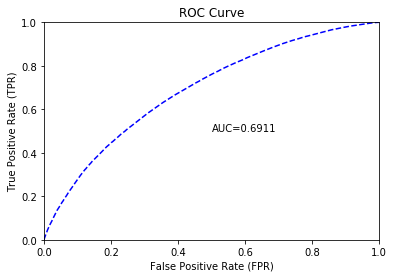

In [0]:
best_gbm_perf3.plot()

In [0]:
gbm_gridperf2

NameError: ignored

In [0]:
#Try Logistic Regression using same train, validation, and test
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
#help(H2OGeneralizedLinearEstimator)

glm_binom_v1 = H2OGeneralizedLinearEstimator(
                    model_id="glm_v1",
                    solver="L_BFGS", #good solver function for many predictors
                    family="binomial",
                    alpha = 1.0,
                    nfolds = 5)

glm_binom_v1.train(covtype_X, covtype_y, training_frame=train, validation_frame=valid)

In [0]:
glm_binom_v1 #lasso regression (removing features)

In [0]:
best_gbm_perf2 = glm_binom_v1.model_performance(test)

best_gbm_perf2.auc()

In [0]:
best_gbm_perf2.plot()

In [0]:
#Try Logistic Regression using same train, validation, and test
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
#help(H2OGeneralizedLinearEstimator)

glm_binom_v2 = H2OGeneralizedLinearEstimator(
                    model_id="glm_v1",
                    solver="L_BFGS", #good solver function for many predictors
                    family="binomial",
                    alpha = 0,
                    nfolds = 5)

glm_binom_v2.train(covtype_X, covtype_y, training_frame=train, validation_frame=valid)

In [0]:
glm_binom_v2

In [0]:
best_gbm_perf3 = glm_binom_v2.model_performance(test)

best_gbm_perf3.auc()

In [0]:
best_gbm_perf3.plot()